In [40]:
%matplotlib inline
import optuna
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_slice


In [45]:
DB_LOCATION = 'sqlite:///220915_results_hyperparameter/optuna.db'
DB_STUDY_NAME = 'amex4_new_params'

In [46]:
study = optuna.create_study(direction="maximize", storage=DB_LOCATION, load_if_exists=True, study_name=DB_STUDY_NAME)
best_params = study.best_params
print(best_params)

[I 2022-09-15 12:46:26,521] Using an existing study with name 'amex4_new_params' instead of creating a new one.


{'boosting_type': 'Ordered', 'correlation_drop_percentage': 0.944055859903021, 'denoise': 1, 'depth': 11, 'impute_per_customer': 1, 'impute_strategy': 'mean', 'iterations': 130, 'learning_rate': 0.05133729314681037}


# Optimization History Plot

-> best Objective Value vs number of trials

/home/geo/.pyenv/versions/3.7.12/envs/220509_aml/lib/python3.7/site-packages/ipykernel_launcher.py:5: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  """


<Figure size 432x288 with 0 Axes>

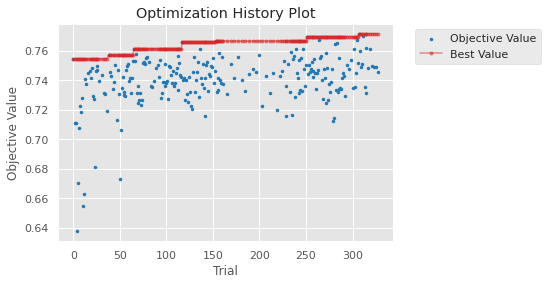

In [49]:
matplotlib.rcParams['lines.markersize'] = 3.0
fig = plt.figure()


plot_optimization_history(study)
fig.tight_layout()
plt.savefig('plots/220915_optimization_history_plot.pdf', bbox_inches='tight')

/home/geo/.pyenv/versions/3.7.12/envs/220509_aml/lib/python3.7/site-packages/ipykernel_launcher.py:2: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  
[W 2022-09-15 13:18:37,431] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


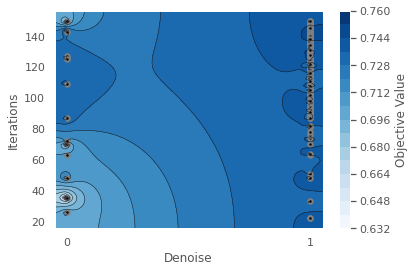

In [86]:
matplotlib.rcParams['lines.markersize'] = 1.0
plot_contour(study, params=['denoise', 'iterations'])
plt.xlabel('Denoise')
plt.ylabel('Iterations')
plt.xticks([0,1])
plt.title("")
plt.savefig("plots/220915_contour_iterations_denoise.pdf", bbox_inches='tight')

/home/geo/.pyenv/versions/3.7.12/envs/220509_aml/lib/python3.7/site-packages/ipykernel_launcher.py:2: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  
[W 2022-09-15 13:18:30,986] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


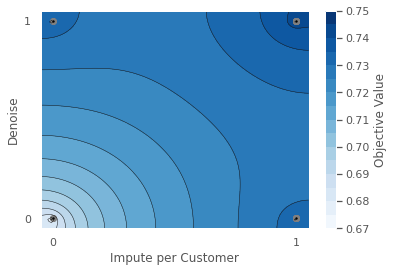

In [85]:
matplotlib.rcParams['lines.markersize'] = 1.0
plot_contour(study, params=['impute_per_customer', 'denoise'])
plt.xlabel('Impute per Customer')
plt.ylabel('Denoise')
plt.xticks([0,1])
plt.yticks([0,1])
plt.title("")
plt.savefig("plots/220915_contour_impute_per_customer_denoise.pdf", bbox_inches='tight')

/home/geo/.pyenv/versions/3.7.12/envs/220509_aml/lib/python3.7/site-packages/ipykernel_launcher.py:2: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  
[W 2022-09-15 13:18:25,079] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


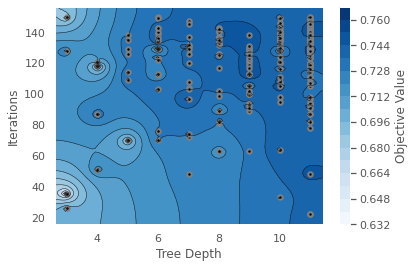

In [84]:
matplotlib.rcParams['lines.markersize'] = 1.0
plot_contour(study, params=['depth', 'iterations'])
plt.ylabel('Iterations')
plt.xlabel('Tree Depth')
plt.title("")
#plt.xticks([0,1])
#plt.yticks([0,1])
plt.savefig("plots/220915_contour_iterations_vs_tree_depth.pdf", bbox_inches='tight')

/home/geo/.pyenv/versions/3.7.12/envs/220509_aml/lib/python3.7/site-packages/ipykernel_launcher.py:2: ExperimentalWarning: plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  
[W 2022-09-15 13:18:15,714] Output figures of this Matplotlib-based `plot_contour` function would be different from those of the Plotly-based `plot_contour`.


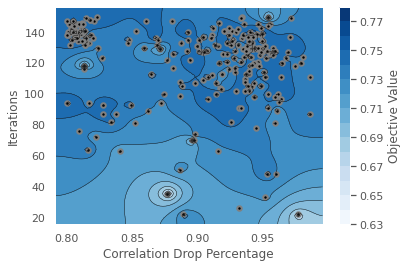

In [82]:
matplotlib.rcParams['lines.markersize'] = 1.0
plot_contour(study, params=['correlation_drop_percentage', 'iterations'])
plt.title("")
plt.ylabel('Iterations')
plt.xlabel('Correlation Drop Percentage')
#plt.xticks([0,1])
#plt.yticks([0,1])
plt.savefig("plots/220915_contour_corr_drop_percentage_iterations.pdf", bbox_inches='tight')

/home/geo/.pyenv/versions/3.7.12/envs/220509_aml/lib/python3.7/site-packages/ipykernel_launcher.py:3: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1152x1152 with 0 Axes>

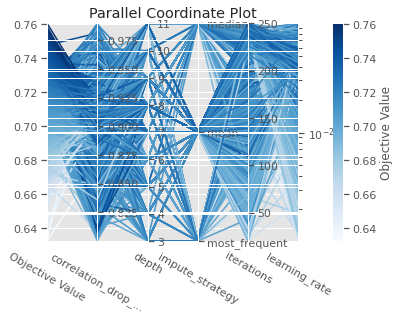

In [34]:
fig = plt.figure()
fig.set_size_inches(16,16)
plot_parallel_coordinate(study)
fig.tight_layout()

In [32]:
plot_param_importances(study)

/home/geo/.pyenv/versions/3.7.12/envs/220509_aml/lib/python3.7/site-packages/ipykernel_launcher.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  """Entry point for launching an IPython kernel.


KeyboardInterrupt: 

In [ ]:
plot_edf(study)